In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/crime-cast-forecasting-crime-categories/sample.csv
/kaggle/input/crime-cast-forecasting-crime-categories/train.csv
/kaggle/input/crime-cast-forecasting-crime-categories/test.csv


## Importing Important libraries 


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder, MultiLabelBinarizer
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV,StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, classification_report, ConfusionMatrixDisplay





# Dataset Loading 

In [3]:
train = pd.read_csv("/kaggle/input/crime-cast-forecasting-crime-categories/train.csv")
test_data = pd.read_csv("/kaggle/input/crime-cast-forecasting-crime-categories/test.csv")


In [4]:
import warnings
warnings.filterwarnings('ignore')  # Ignore all warnings


# Data Analysis / EDA


In [5]:
print("Training data overview:")
print(train.head())



Training data overview:
                                   Location                     Cross_Street  \
0   4500    CARPENTER                    AV                              NaN   
1           45TH                         ST  ALAMEDA                      ST   
2    600 E  MARTIN LUTHER KING JR        BL                              NaN   
3  14900    ORO GRANDE                   ST                              NaN   
4   7100 S  VERMONT                      AV                              NaN   

   Latitude  Longitude           Date_Reported           Date_Occurred  \
0   34.1522  -118.3910  03/09/2020 12:00:00 AM  03/06/2020 12:00:00 AM   
1   34.0028  -118.2391  02/27/2020 12:00:00 AM  02/27/2020 12:00:00 AM   
2   34.0111  -118.2653  08/21/2020 12:00:00 AM  08/21/2020 12:00:00 AM   
3   34.2953  -118.4590  11/08/2020 12:00:00 AM  11/06/2020 12:00:00 AM   
4   33.9787  -118.2918  02/25/2020 12:00:00 AM  02/25/2020 12:00:00 AM   

   Time_Occurred  Area_ID    Area_Name  Reporting_

In [6]:
print("\nTest data overview:")
print(test_data.head())


Test data overview:
                                   Location Cross_Street  Latitude  Longitude  \
0   1500    LEIGHTON                     AV          NaN   34.0128  -118.3045   
1    100 S  NORMANDIE                    AV          NaN   34.0726  -118.3029   
2    300 E  111TH                        ST          NaN   33.9348  -118.2695   
3   1300 S  LA BREA                      AV          NaN   34.0497  -118.3442   
4  11000    MORRISON                     ST          NaN   34.1611  -118.3704   

            Date_Reported           Date_Occurred  Time_Occurred  Area_ID  \
0  03/03/2020 12:00:00 AM  03/03/2020 12:00:00 AM         2000.0      3.0   
1  06/01/2020 12:00:00 AM  04/25/2020 12:00:00 AM         1700.0     20.0   
2  08/28/2020 12:00:00 AM  08/27/2020 12:00:00 AM          900.0     18.0   
3  12/23/2020 12:00:00 AM  12/03/2020 12:00:00 AM         2200.0      7.0   
4  08/30/2020 12:00:00 AM  08/29/2020 12:00:00 AM          130.0     15.0   

     Area_Name  Reporting_Dis

In [7]:
# Check for missing values
print("\nMissing values in training data:")
print(train.isnull().sum())



Missing values in training data:
Location                     0
Cross_Street             16552
Latitude                     0
Longitude                    0
Date_Reported                0
Date_Occurred                0
Time_Occurred                0
Area_ID                      0
Area_Name                    0
Reporting_District_no        0
Part 1-2                     0
Modus_Operandi            2741
Victim_Age                   0
Victim_Sex                2624
Victim_Descent            2624
Premise_Code                 0
Premise_Description          5
Weapon_Used_Code         12665
Weapon_Description       12665
Status                       0
Status_Description           0
Crime_Category               0
dtype: int64


In [8]:

print("\nMissing values in test data:")
print(test_data.isnull().sum())


Missing values in test data:
Location                    0
Cross_Street             4190
Latitude                    0
Longitude                   0
Date_Reported               0
Date_Occurred               0
Time_Occurred               0
Area_ID                     0
Area_Name                   0
Reporting_District_no       0
Part 1-2                    0
Modus_Operandi            684
Victim_Age                  0
Victim_Sex                643
Victim_Descent            643
Premise_Code                0
Premise_Description         1
Weapon_Used_Code         3153
Weapon_Description       3153
Status                      0
Status_Description          0
dtype: int64


Data Analysis and Visualization

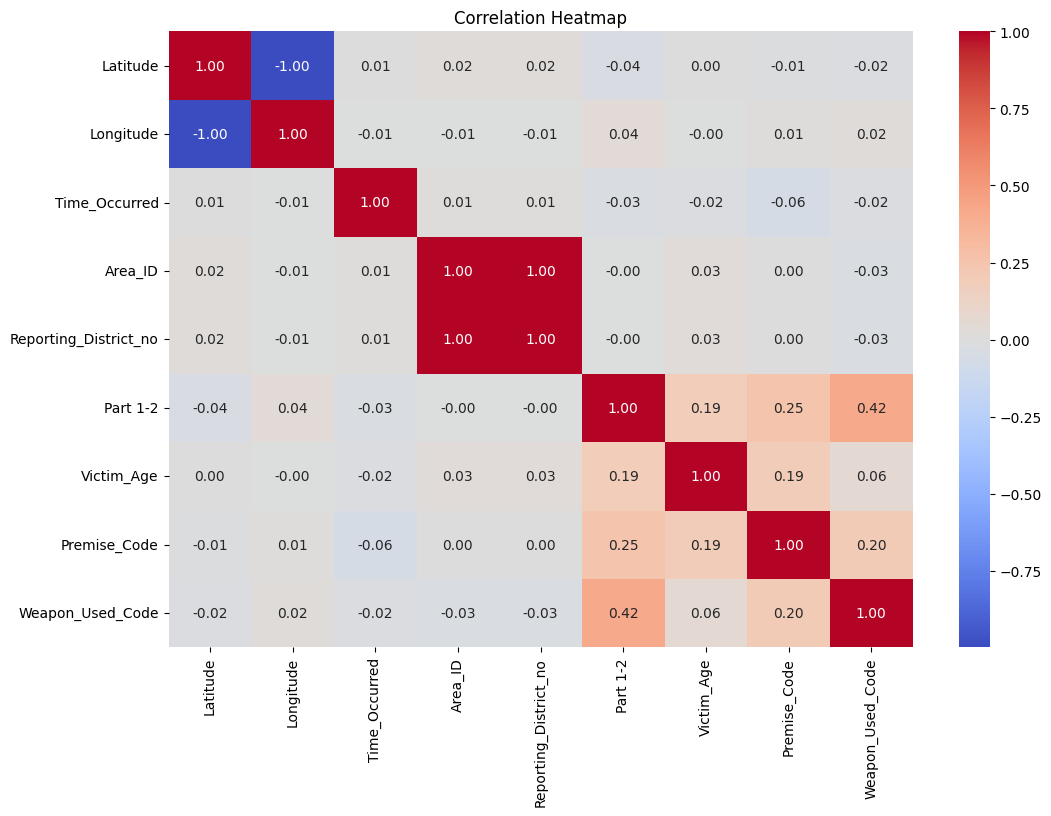

In [9]:
# Correlation Heatmap
plt.figure(figsize=(12, 8))
corr_matrix = train.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

Above heat map shows the correleation between two columns :-
As we can see the Area_ID and Reporting_District_no is highly correlated to each other their correlation is 1,While Latitude & Longitude are negatively correleated.

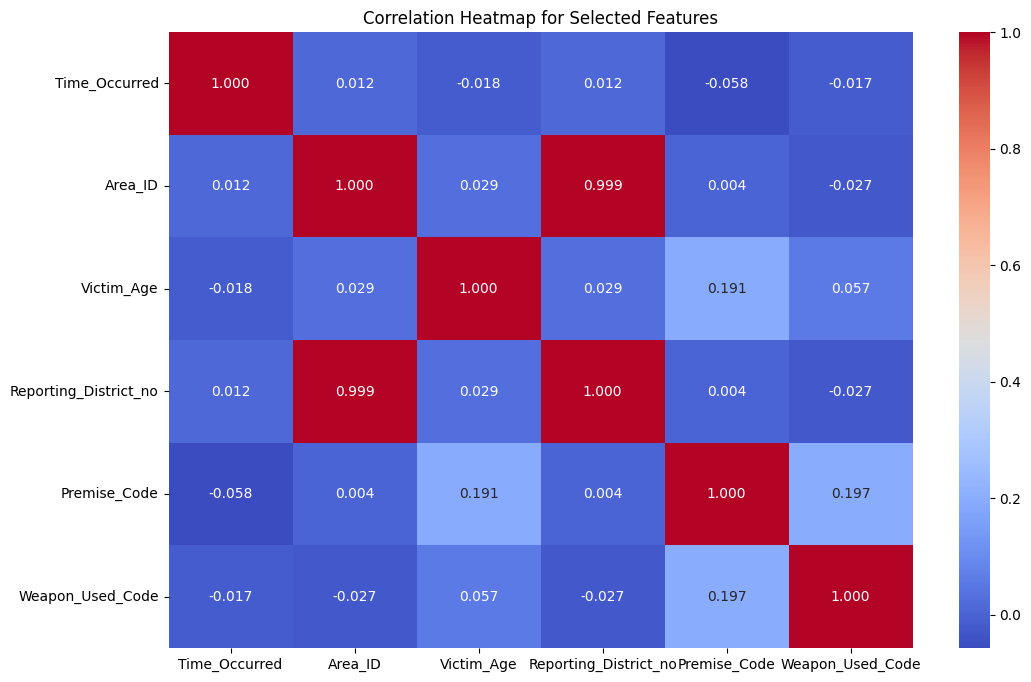

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Specify the relevant columns for the heatmap
columns_of_interest = ['Time_Occurred', 'Area_ID', 'Victim_Age', 'Reporting_District_no', 
                       'Premise_Code', 'Weapon_Used_Code']

# Calculate the correlation matrix for the selected columns
corr_matrix = train[columns_of_interest].corr(numeric_only=True)

# Draw the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.3f')
plt.title('Correlation Heatmap for Selected Features')
plt.show()


Above heatmap is only for selected features and we can see Reporting_District_no and Area Id has highest positive correlation 

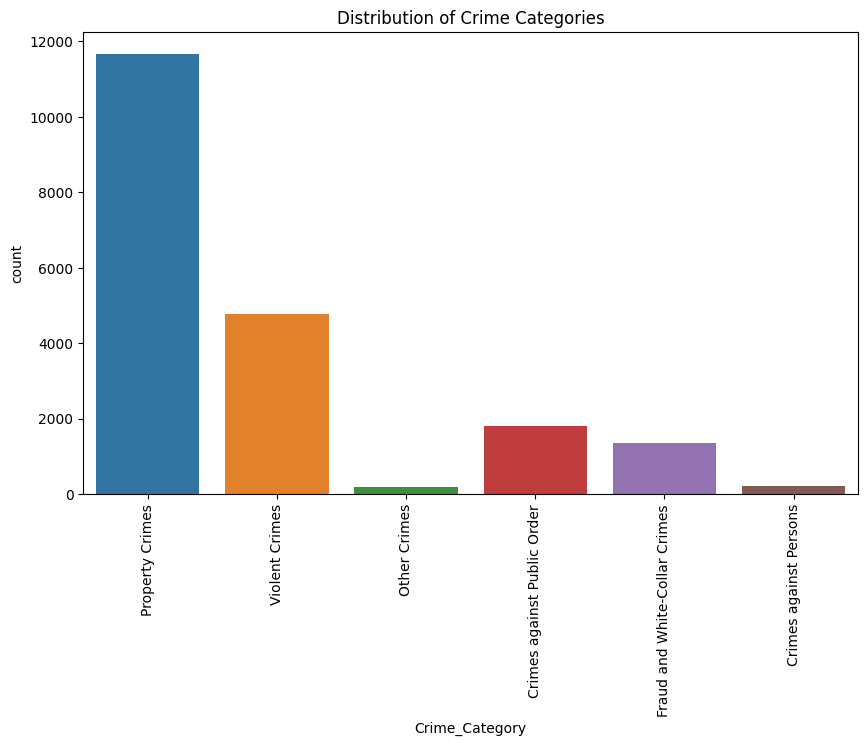

In [11]:
#Visualize distribution of target variable
plt.figure(figsize=(10, 6))
sns.countplot(data=train, x='Crime_Category')
plt.xticks(rotation=90)
plt.title('Distribution of Crime Categories')
plt.show()

According to above graph property crimes is the highest crime category.

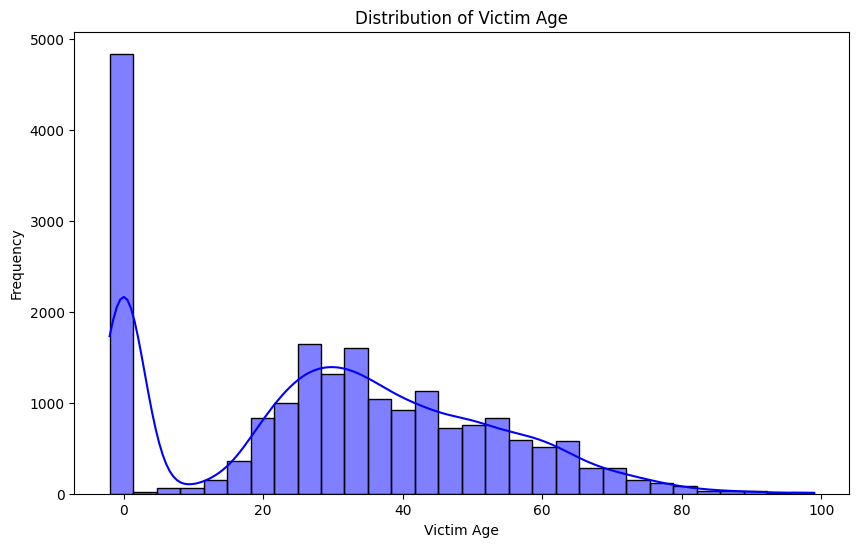

In [12]:
# Drop null values from Victim_Age
victim_age_cleaned = train['Victim_Age'].dropna()

# Visualize distribution of Victim Age
plt.figure(figsize=(10, 6))
sns.histplot(victim_age_cleaned, bins=30, kde=True, color='blue')
plt.title('Distribution of Victim Age')
plt.xlabel('Victim Age')
plt.ylabel('Frequency')
plt.show()

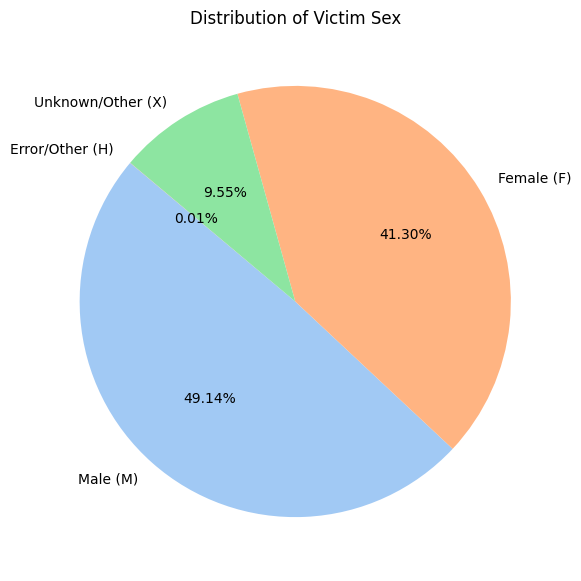

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the occurrences of each category in Victim_Sex
victim_sex_counts = train['Victim_Sex'].value_counts()

# Create a mapping for better readability
labels = ['Male (M)', 'Female (F)', 'Unknown/Other (X)', 'Error/Other (H)']

# Create a pie chart
plt.figure(figsize=(7, 7))
plt.pie(victim_sex_counts, labels=labels, autopct='%1.2f%%', 
        colors=sns.color_palette('pastel'), startangle=140)
plt.title('Distribution of Victim Sex')
plt.show()


Chart Conclude that the maximum Crimes are commited by Males

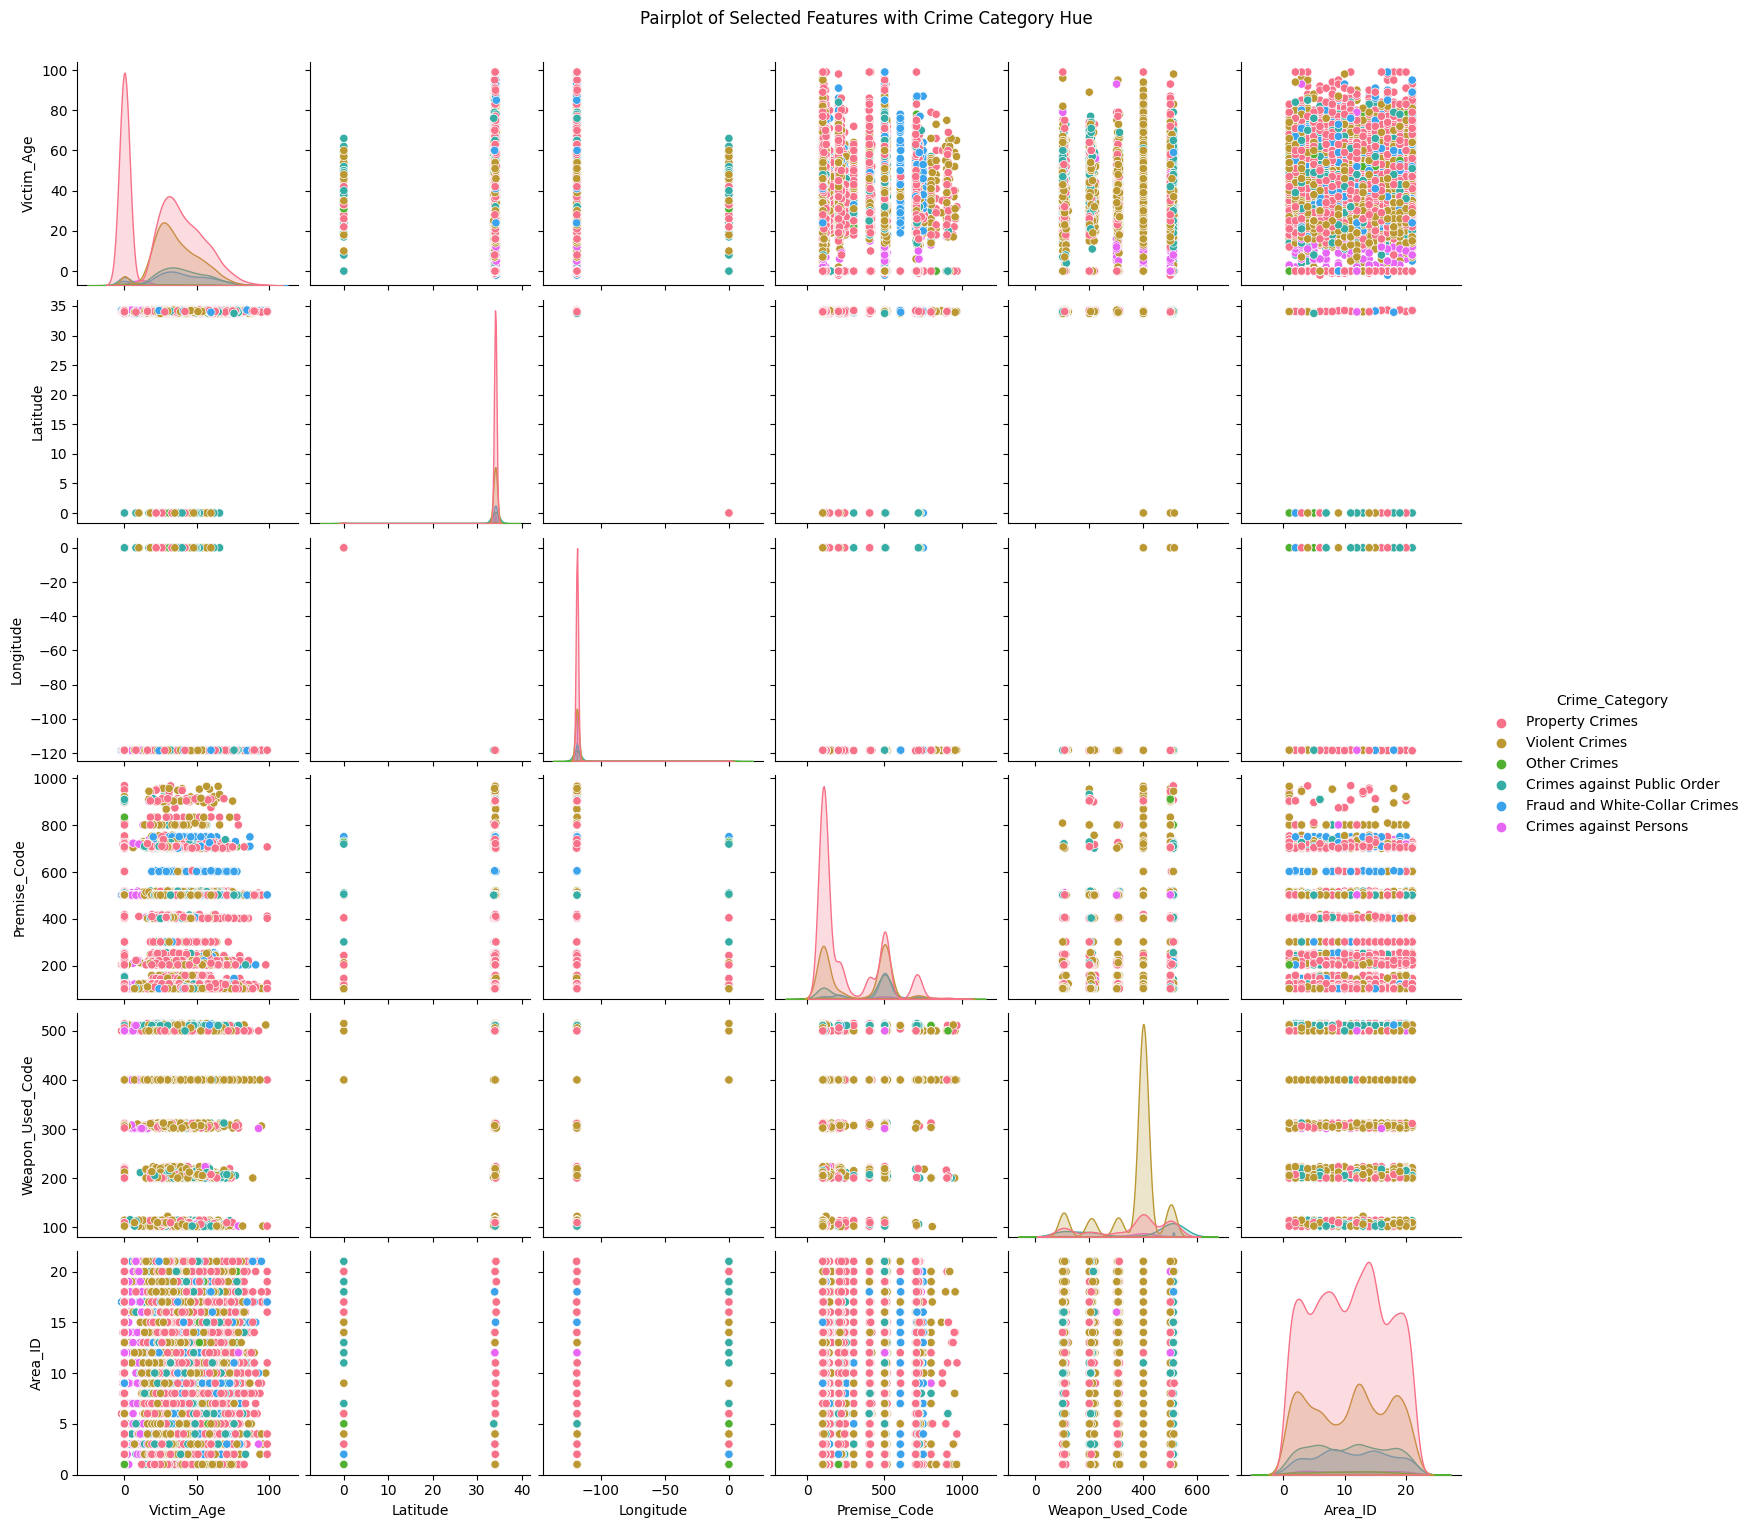

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Add relevant columns to the pairplot, including categorical as hue
sns.pairplot(train[['Victim_Age', 'Latitude', 'Longitude', 'Premise_Code', 'Weapon_Used_Code', 'Area_ID', 'Crime_Category']], 
             hue='Crime_Category', palette='husl', diag_kind='kde')

plt.suptitle('Pairplot of Selected Features with Crime Category Hue', y=1.02)
plt.show()


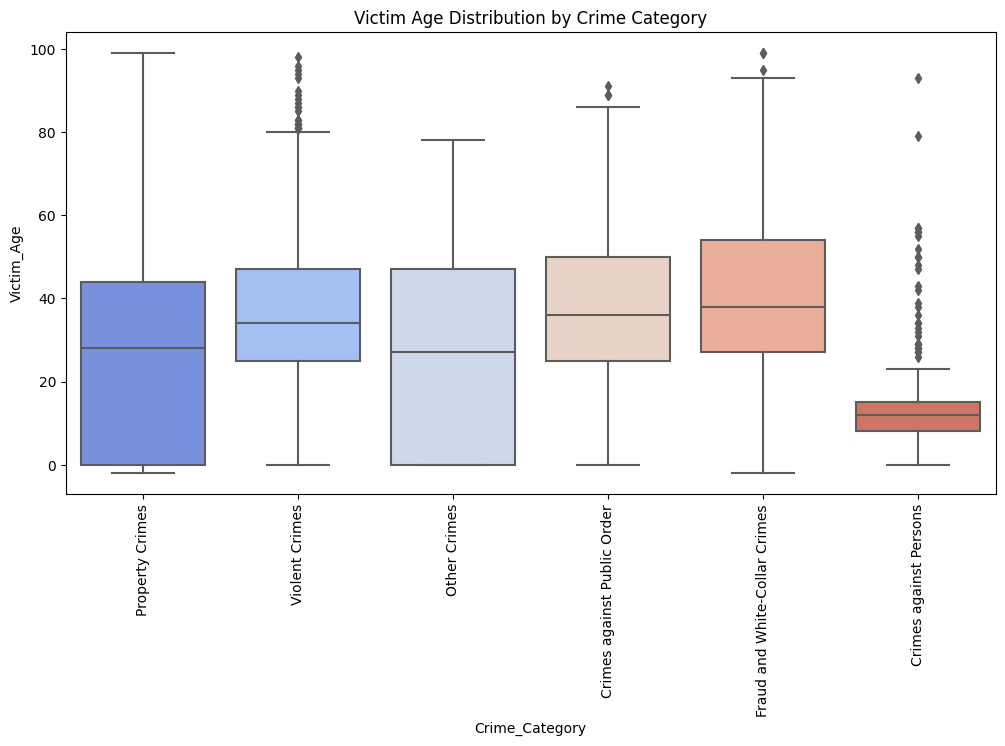

In [15]:
# Boxplot for Victim Age by Crime Category
plt.figure(figsize=(12, 6))
sns.boxplot(x=train['Crime_Category'], y=train['Victim_Age'], palette='coolwarm')
plt.xticks(rotation=90)
plt.title('Victim Age Distribution by Crime Category')
plt.show()

Above Box plots conclude that Violent Crimes and crime against person has most outliers on the Victims age distribution.


## Feature Extractions 

In [16]:
#Extract useful features from Date_Reported and Date_Occurred
train['Date_Reported'] = pd.to_datetime(train['Date_Reported'], errors='coerce')
train['Date_Occurred'] = pd.to_datetime(train['Date_Occurred'], errors='coerce')

train['Year_Reported'] = train['Date_Reported'].dt.year
train['Month_Reported'] = train['Date_Reported'].dt.month
train['Day_Reported'] = train['Date_Reported'].dt.day
train['DayOfWeek_Reported'] = train['Date_Reported'].dt.dayofweek

train['Year_Occurred'] = train['Date_Occurred'].dt.year
train['Month_Occurred'] = train['Date_Occurred'].dt.month
train['Day_Occurred'] = train['Date_Occurred'].dt.day
train['DayOfWeek_Occurred'] = train['Date_Occurred'].dt.dayofweek


In [17]:
#Extract hour and minute from Time_Occurred
def extract_hour_minute(time_val):
    time_str = str(int(time_val)).zfill(4)
    hour = int(time_str[:2])
    minute = int(time_str[2:])
    return hour, minute

train[['Hour_Occurred', 'Minute_Occurred']] = train['Time_Occurred'].apply(lambda x: pd.Series(extract_hour_minute(x)))


## Apply the same transformations to the test data

In [18]:
test_data['Date_Reported'] = pd.to_datetime(test_data['Date_Reported'], errors='coerce')
test_data['Date_Occurred'] = pd.to_datetime(test_data['Date_Occurred'], errors='coerce')

test_data['Year_Reported'] = test_data['Date_Reported'].dt.year
test_data['Month_Reported'] = test_data['Date_Reported'].dt.month
test_data['Day_Reported'] = test_data['Date_Reported'].dt.day
test_data['DayOfWeek_Reported'] = test_data['Date_Reported'].dt.dayofweek

test_data['Year_Occurred'] = test_data['Date_Occurred'].dt.year
test_data['Month_Occurred'] = test_data['Date_Occurred'].dt.month
test_data['Day_Occurred'] = test_data['Date_Occurred'].dt.day
test_data['DayOfWeek_Occurred'] = test_data['Date_Occurred'].dt.dayofweek

test_data[['Hour_Occurred', 'Minute_Occurred']] = test_data['Time_Occurred'].apply(lambda x: pd.Series(extract_hour_minute(x)))


In [19]:
# Process Modus_Operandi column
train['Modus_Operandi'] = train['Modus_Operandi'].fillna('').apply(lambda x: x.split())
test_data['Modus_Operandi'] = test_data['Modus_Operandi'].fillna('').apply(lambda x: x.split())


In [20]:
mlb = MultiLabelBinarizer()
train_mo = pd.DataFrame(mlb.fit_transform(train['Modus_Operandi']), columns=mlb.classes_, index=train.index)
test_mo = pd.DataFrame(mlb.transform(test_data['Modus_Operandi']), columns=mlb.classes_, index=test_data.index)

train = train.join(train_mo).drop(columns=['Modus_Operandi'])
test_data = test_data.join(test_mo).drop(columns=['Modus_Operandi'])


In [21]:
# Drop other unnecessary columns
columns_to_drop = ['Location', 'Cross_Street', 'Premise_Description', 
                   'Weapon_Used_Code', 'Area_Name','Weapon_Description',
                   'Date_Occurred', 'Date_Reported', 'Time_Occurred']
existing_columns_to_drop = [col for col in columns_to_drop if col in train.columns]
train = train.drop(columns=existing_columns_to_drop)
test_data = test_data.drop(columns=existing_columns_to_drop)


In [22]:
train.head()

,Latitude,Longitude,Area_ID,Reporting_District_no,Part 1-2,Victim_Age,Victim_Sex,Victim_Descent,Premise_Code,Status,...,2126,2157,2201,2204,2303,2304,3003,3004,4025,9999
0,34.1522,-118.3910,15.0,1563.0,1.0,75.0,M,W,101.0,IC,...,0,0,0,0,0,0,0,0,0,0
1,34.0028,-118.2391,13.0,1367.0,1.0,41.0,M,H,216.0,IC,...,0,0,0,0,0,0,0,0,0,0
2,34.0111,-118.2653,13.0,1343.0,2.0,67.0,M,B,501.0,IC,...,0,0,0,0,0,0,0,0,0,0
3,34.2953,-118.4590,19.0,1924.0,1.0,61.0,M,H,101.0,IC,...,0,0,0,0,0,0,0,0,0,0
4,33.9787,-118.2918,12.0,1245.0,1.0,0.0,X,X,401.0,IC,...,0,0,0,0,0,0,0,0,0,0


In [23]:
test_data.head()

,Latitude,Longitude,Area_ID,Reporting_District_no,Part 1-2,Victim_Age,Victim_Sex,Victim_Descent,Premise_Code,Status,...,2126,2157,2201,2204,2303,2304,3003,3004,4025,9999
0,34.0128,-118.3045,3.0,376.0,2.0,28.0,F,H,501.0,IC,...,0,0,0,0,0,0,0,0,0,0
1,34.0726,-118.3029,20.0,2014.0,1.0,26.0,M,B,502.0,IC,...,0,0,0,0,0,0,0,0,0,0
2,33.9348,-118.2695,18.0,1844.0,2.0,62.0,F,B,721.0,IC,...,0,0,0,0,0,0,0,0,0,0
3,34.0497,-118.3442,7.0,765.0,1.0,0.0,NaN,NaN,108.0,IC,...,0,0,0,0,0,0,0,0,0,0
4,34.1611,-118.3704,15.0,1555.0,2.0,37.0,F,W,501.0,AO,...,0,0,0,0,0,0,0,0,0,0


## Label Encoding and Data Imputation 

In [24]:
# Label encode the Status column
label_encoder_status = LabelEncoder()
train['Status'] = label_encoder_status.fit_transform(train['Status'])
test_data['Status'] = label_encoder_status.transform(test_data['Status'])

# Ordinal encode the Area_ID column by converting it to an integer
#train['Area_ID'] = train['Area_ID'].astype(int)
#test_data['Area_ID'] = test_data['Area_ID'].astype(int)

# Impute negative and zero values in Victim_Age with the median of positive values
median_victim_age = train[train['Victim_Age'] > 0]['Victim_Age'].median()
train['Victim_Age'] = train['Victim_Age'].apply(lambda x: median_victim_age if x <= 0 else x)
test_data['Victim_Age'] = test_data['Victim_Age'].apply(lambda x: median_victim_age if x <= 0 else x)

# Impute missing values for Victim_Sex with 'M'
train['Victim_Sex'].fillna('M', inplace=True)
test_data['Victim_Sex'].fillna('M', inplace=True)

# Impute missing values for Victim_Descent with 'B'
train['Victim_Descent'].fillna('B', inplace=True)
test_data['Victim_Descent'].fillna('B', inplace=True)



## Data Training Testing and Spliting 
## encoding

In [25]:
# Spliting the data into features and target variable
X = train.drop('Crime_Category', axis=1)
y = train['Crime_Category']

# Spliting the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=42)



In [26]:
# Encoding the target variable
label_encoder_crime = LabelEncoder()
y_train = label_encoder_crime.fit_transform(y_train)
y_val = label_encoder_crime.transform(y_val)


In [27]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Define the preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        # OneHotEncode categorical variables
        ('ohe', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), 
         ['Victim_Sex', 'Victim_Descent', 'Status', 'Area_ID']),
        
        # Standardize numerical features
        ('ss', StandardScaler(), ['Latitude', 'Longitude']),
        
        # Apply TF-IDF to the text data 
        ('tfidf', TfidfVectorizer(), 'Status_Description'),
        
        # Pass through other numerical columns
        ('passthrough', 'passthrough', ['Premise_Code', 'Reporting_District_no', 'Victim_Age',
                                        'Year_Reported', 'Month_Reported', 'Day_Reported', 
                                        'DayOfWeek_Reported', 'Year_Occurred', 'Month_Occurred', 
                                        'Day_Occurred', 'DayOfWeek_Occurred', 'Hour_Occurred', 
                                        'Minute_Occurred'])
    ],
    remainder='passthrough',
    verbose_feature_names_out=False
)

# Fit and transform the data
transformed_data = preprocessor.fit_transform(train)

# If needed, convert the result to a DataFrame
column_names = (preprocessor.get_feature_names_out())
transformed_df = pd.DataFrame(transformed_data, columns=column_names)

# Display the first few rows of the transformed DataFrame
transformed_df.head()


,Victim_Sex_F,Victim_Sex_H,Victim_Sex_M,Victim_Sex_X,Victim_Descent_A,Victim_Descent_B,Victim_Descent_C,Victim_Descent_D,Victim_Descent_F,Victim_Descent_G,...,2126,2157,2201,2204,2303,2304,3003,3004,4025,9999
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


# Create the pipeline

In [28]:

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])
pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Victim_Sex',
                                                   'Victim_Descent', 'Status',
                                                   'Area_ID']),
                                                 ('ss', StandardScaler(),
                                                  ['Latitude', 'Longitude']),
                                                 ('tfidf', TfidfVectorizer(),
                                                  'Status_Description'),
                                                 ('passthrough', 'passthrough',
                                                  ['Premise_Code',
                                                   'Reporting_District_no',
                                                   'Victim_Age',
                                                   'Year_Reported',
                                                   'Month_Reported',
                                                   'Day_Reported',
                                                   'DayOfWeek_Reported',
                                                   'Year_Occurred',
                                                   'Month_Occurred',
                                                   'Day_Occurred',
                                                   'DayOfWeek_Occurred',
                                                   'Hour_Occurred',
                                                   'Minute_Occurred'])],
                                   verbose_feature_names_out=False))])

In [29]:
# Transform the data
X_train = pipeline.fit_transform(X_train)
X_val = pipeline.transform(X_val)
X_test = pipeline.transform(test_data)

## Defining the models

In [30]:

# Define the models
models = {
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'LightGBM': LGBMClassifier(random_state=42)
    
}

# Models Comparision 

In [31]:
# Train, predict, and evaluate each model
model_accuracies = {}
model_f1_scores = {}
model_precisions = {}
model_recalls = {}


Gradient Boosting accuracy: 0.9352
Gradient Boosting F1 score: 0.9335
Gradient Boosting Precision: 0.9329
Gradient Boosting Recall: 0.9352


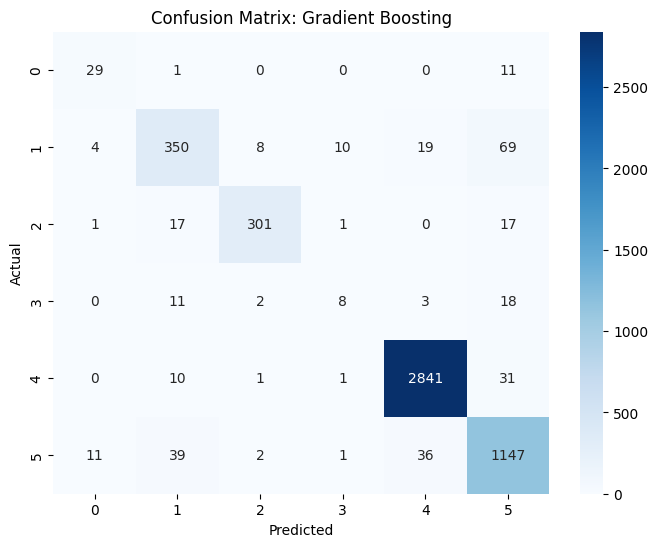

Classification Report for Gradient Boosting:
              precision    recall  f1-score   support

           0       0.64      0.71      0.67        41
           1       0.82      0.76      0.79       460
           2       0.96      0.89      0.92       337
           3       0.38      0.19      0.25        42
           4       0.98      0.99      0.98      2884
           5       0.89      0.93      0.91      1236

    accuracy                           0.94      5000
   macro avg       0.78      0.74      0.76      5000
weighted avg       0.93      0.94      0.93      5000

--------------------------------------------------
Random Forest accuracy: 0.9300
Random Forest F1 score: 0.9241
Random Forest Precision: 0.9251
Random Forest Recall: 0.9300


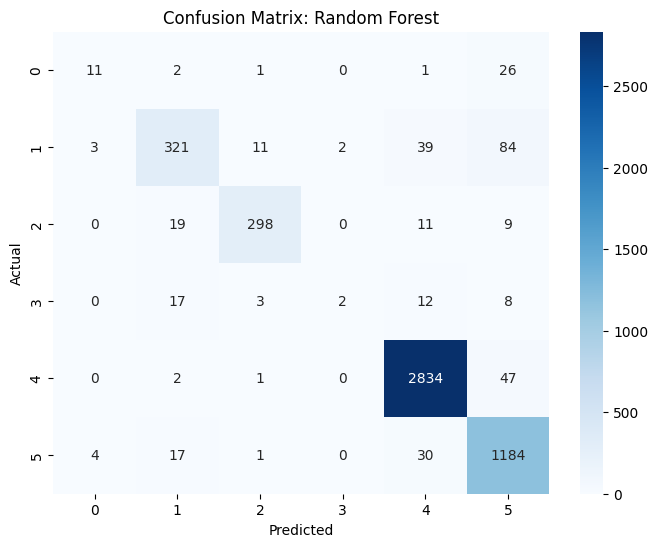

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.61      0.27      0.37        41
           1       0.85      0.70      0.77       460
           2       0.95      0.88      0.91       337
           3       0.50      0.05      0.09        42
           4       0.97      0.98      0.98      2884
           5       0.87      0.96      0.91      1236

    accuracy                           0.93      5000
   macro avg       0.79      0.64      0.67      5000
weighted avg       0.93      0.93      0.92      5000

--------------------------------------------------
XGBoost accuracy: 0.9520
XGBoost F1 score: 0.9508
XGBoost Precision: 0.9503
XGBoost Recall: 0.9520


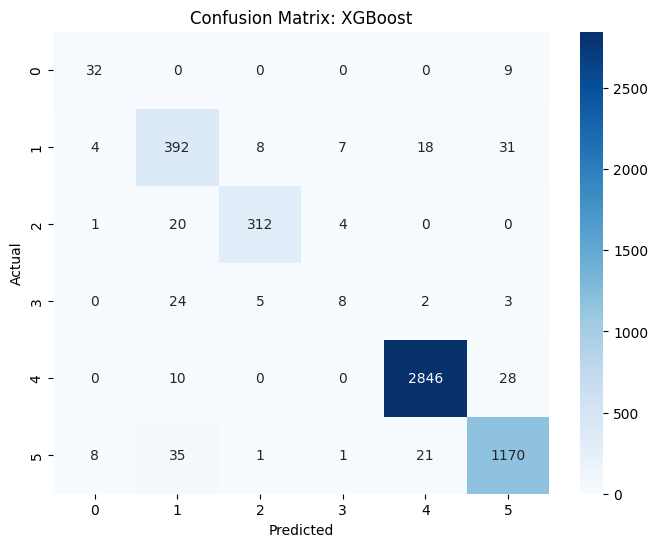

Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       0.71      0.78      0.74        41
           1       0.81      0.85      0.83       460
           2       0.96      0.93      0.94       337
           3       0.40      0.19      0.26        42
           4       0.99      0.99      0.99      2884
           5       0.94      0.95      0.94      1236

    accuracy                           0.95      5000
   macro avg       0.80      0.78      0.78      5000
weighted avg       0.95      0.95      0.95      5000

--------------------------------------------------
Decision Tree accuracy: 0.9176
Decision Tree F1 score: 0.9190
Decision Tree Precision: 0.9212
Decision Tree Recall: 0.9176


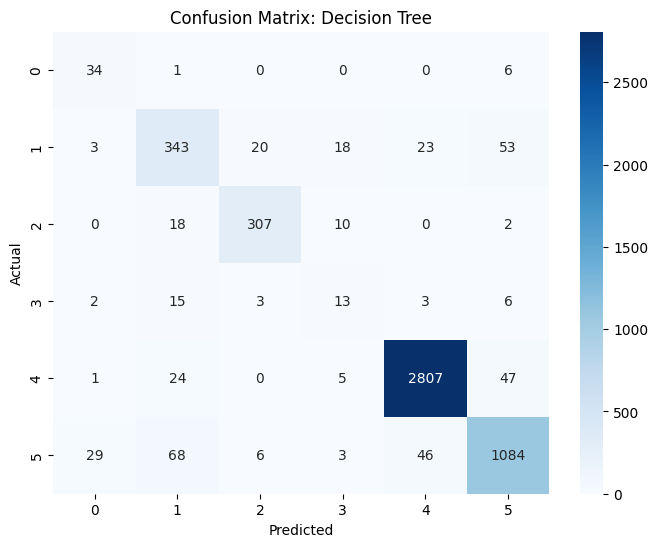

Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.49      0.83      0.62        41
           1       0.73      0.75      0.74       460
           2       0.91      0.91      0.91       337
           3       0.27      0.31      0.29        42
           4       0.97      0.97      0.97      2884
           5       0.90      0.88      0.89      1236

    accuracy                           0.92      5000
   macro avg       0.71      0.77      0.74      5000
weighted avg       0.92      0.92      0.92      5000

--------------------------------------------------
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.017451 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1625
[LightGBM] [Info] Number of data points in the train set: 15000, number of used features: 226
[LightGBM] 

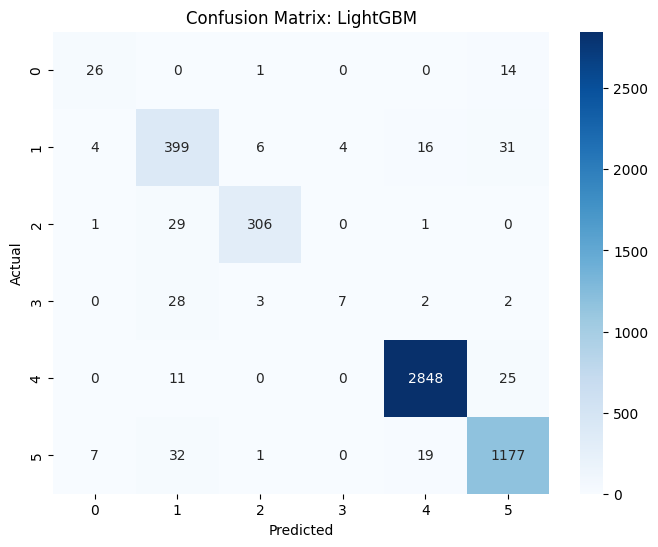

Classification Report for LightGBM:
              precision    recall  f1-score   support

           0       0.68      0.63      0.66        41
           1       0.80      0.87      0.83       460
           2       0.97      0.91      0.94       337
           3       0.64      0.17      0.26        42
           4       0.99      0.99      0.99      2884
           5       0.94      0.95      0.95      1236

    accuracy                           0.95      5000
   macro avg       0.84      0.75      0.77      5000
weighted avg       0.95      0.95      0.95      5000

--------------------------------------------------


In [32]:
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_val, y_pred)
    model_accuracies[model_name] = accuracy
    
    # Calculate F1 score
    f1 = f1_score(y_val, y_pred, average='weighted')
    model_f1_scores[model_name] = f1
    
    # Calculate precision
    precision = precision_score(y_val, y_pred, average='weighted')
    model_precisions[model_name] = precision
    
    # Calculate recall
    recall = recall_score(y_val, y_pred, average='weighted')
    model_recalls[model_name] = recall
    # Print the accuracy and F1 score
    print(f"{model_name} accuracy: {accuracy:.4f}")
    print(f"{model_name} F1 score: {f1:.4f}")
    print(f"{model_name} Precision: {precision:.4f}")
    print(f"{model_name} Recall: {recall:.4f}")
    
    # Generate and plot the confusion matrix
    cm = confusion_matrix(y_val, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix: {model_name}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()
    
    # Print classification report
    print(f'Classification Report for {model_name}:')
    print(classification_report(y_val, y_pred))
    print('--------------------------------------------------')

In [33]:
# Output the results
print("\nModel Accuracies:")
for model_name, accuracy in model_accuracies.items():
    print(f"{model_name}: {accuracy:.4f}")



Model Accuracies:
Gradient Boosting: 0.9352
Random Forest: 0.9300
XGBoost: 0.9520
Decision Tree: 0.9176
LightGBM: 0.9526


In [34]:
print("\nModel F1 Scores:")
for model_name, f1 in model_f1_scores.items():
    print(f"{model_name}: {f1:.4f}")



Model F1 Scores:
Gradient Boosting: 0.9335
Random Forest: 0.9241
XGBoost: 0.9508
Decision Tree: 0.9190
LightGBM: 0.9508


In [35]:
print("\nModel Precisions:")
for model_name, precision in model_precisions.items():
    print(f"{model_name}: {precision:.4f}")


Model Precisions:
Gradient Boosting: 0.9329
Random Forest: 0.9251
XGBoost: 0.9503
Decision Tree: 0.9212
LightGBM: 0.9517


In [36]:
print("\nModel Recalls:")
for model_name, recall in model_recalls.items():
    print(f"{model_name}: {recall:.4f}")


Model Recalls:
Gradient Boosting: 0.9352
Random Forest: 0.9300
XGBoost: 0.9520
Decision Tree: 0.9176
LightGBM: 0.9526


Graphical representation of Accuracies 

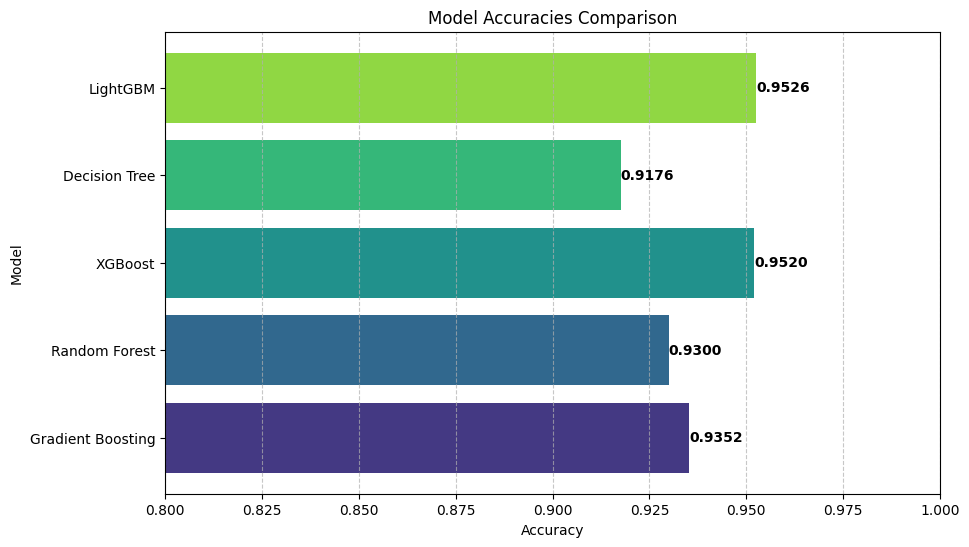

In [37]:
model_names = list(model_accuracies.keys())
accuracies = list(model_accuracies.values())

# Set a color palette with different colors for each bar
palette = sns.color_palette("viridis", len(model_names))

# Create a bar graph with the colorful palette
plt.figure(figsize=(10, 6))
bars = plt.barh(model_names, accuracies, color=palette)

# Add accuracy values to the bars
for bar, accuracy in zip(bars, accuracies):
    plt.text(accuracy, bar.get_y() + bar.get_height() / 2, f"{accuracy:.4f}", 
             va='center', ha='left', color='black', fontweight='bold')

plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.title('Model Accuracies Comparison')
plt.xlim(0.8, 1)  # Accuracy values range from 0 to 1
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

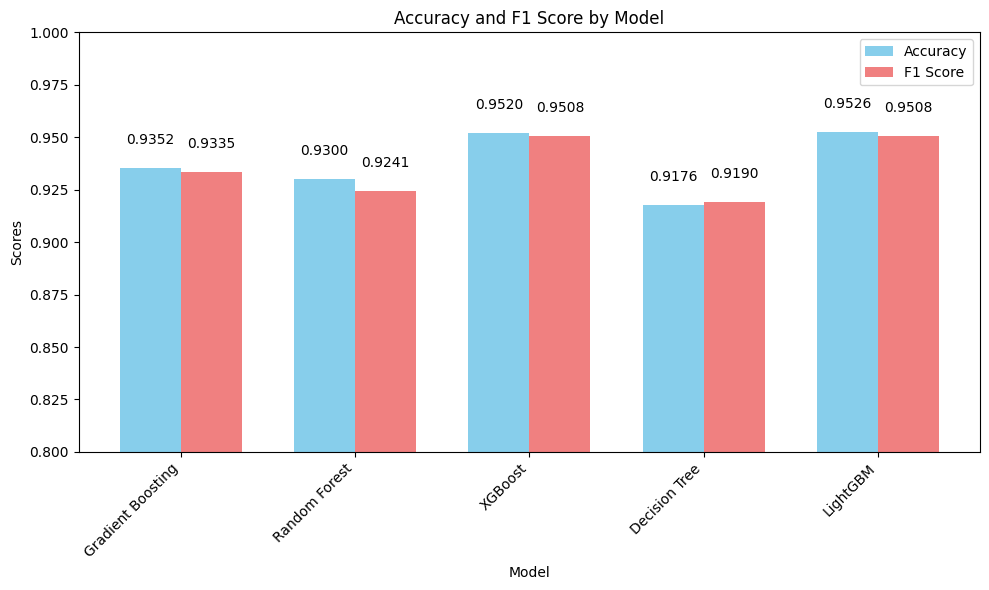

In [38]:
import matplotlib.pyplot as plt
import numpy as np

# Data preparation
models = list(model_accuracies.keys())
accuracies = list(model_accuracies.values())
f1_scores = list(model_f1_scores.values())

# Define the width of the bars
bar_width = 0.35
index = np.arange(len(models))

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot bars for accuracy and F1 score
bars1 = ax.bar(index, accuracies, bar_width, label='Accuracy', color='skyblue')
bars2 = ax.bar(index + bar_width, f1_scores, bar_width, label='F1 Score', color='lightcoral')

#setting y axis's limit
ax.set_ylim(0.8, 1.0)


# Adding labels and title
ax.set_xlabel('Model')
ax.set_ylabel('Scores')
ax.set_title('Accuracy and F1 Score by Model')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(models, rotation=45, ha='right')
ax.legend()

# Display the values on top of the bars
for bars in [bars1, bars2]:
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, yval + 0.01, f'{yval:.4f}', ha='center', va='bottom')

# Adjust layout and show plot
plt.tight_layout()
plt.show()


## Comparision Result 
On the basis of above analysis it is clear that LightGBM is the best Model 

# HyperParaMeter tuning and cross fold validation of Best Model


In [39]:
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV, KFold

lgbm = lgb.LGBMClassifier(random_state=64)
Param_grid = {
    'boosting_type':['gbdt'],#'dart',"goss"],
    'num_leaves':[31],#50,100,150],
    'max_depth':[-1],#10,20,30,50],
    'learning_rate':[0.1],#0.001,0.01,0.1,0.2,0.3],
    'n_estimators':[100],#50,100,200,300],
    'subsample':[1.0],# 0.6,0.8,1.0],
    'colsample_bytree':[1], #0.6,0.8,1.0],
    'reg_alpha':[0],# 0.1,0.5,1.0],
    'reg_lambda':[0],#0.1,0.5,1.0]
}

gscv=GridSearchCV(lgbm, Param_grid, cv=2, scoring='accuracy',n_jobs=-1)

# Fit the GridSearchCV model
gscv.fit(X_train, y_train)

# Get the best model and parameters
best_lgbm_model = gscv.best_estimator_
print(f"Best parameters found for LightGBM: {gscv.best_params_}")

# Evaluate the best model on the validation set
y_val_pred_lgbm = best_lgbm_model.predict(X_val)
accuracy_lgbm = accuracy_score(y_val, y_val_pred_lgbm)
print(f"Validation accuracy with LightGBM (with CV): {accuracy_lgbm:.4f}")


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008709 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1505
[LightGBM] [Info] Number of data points in the train set: 7500, number of used features: 185
[LightGBM] [Info] Start training from score -4.400870
[LightGBM] [Info] Start training from score -2.409428
[LightGBM] [Info] Start training from score -2.690210
[LightGBM] [Info] Start training from score -4.688552
[LightGBM] [Info] Start training from score -0.535346
[LightGBM] [Info] Start training from score -1.446752
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008537 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1515
[LightGBM] [Info] Number of data points in the train set: 7500,

### Validation accuracy with LightGBM (with CV): 0.9526


In [40]:
# Predictions for the test set
y_test_pred_lgbm = best_lgbm_model.predict(X_test)

# Inverse transform predictions to original labels (if encoded)
y_test_pred_lgbm_original = label_encoder_crime.inverse_transform(y_test_pred_lgbm)

In [41]:
# Create the submission file
kaggle_submission_lgbm = pd.DataFrame({'ID': range(1, len(y_test_pred_lgbm_original) + 1), 'Crime_Category': y_test_pred_lgbm_original})
kaggle_submission_lgbm.to_csv('submission_lgbm.csv', index=False)